# [GIS<sup>Geospatial Information System</sup>]Geopandas Tutorial
이 내용은 [yg's blog](https://yganalyst.github.io/spatial_analysis/spatial_analysis_1/)를 보고 공부하기 위해 작성한 내용입니다.

# 목차

# GIS<sup>Geospatial Information System</sup>란?
지도를 점<sup>Point</sup>, 선<sup>Line</sup> 또는 영역<sup>Polygon</sup>과 같은 지리 정보 데이터로 변환하여 효율적으로 활용하기 위한 정보 시스템
<img src="https://yganalyst.github.io/assets/images/gis_logo.jpg" alt="GIS" height=50% width=50%>


## GIS Data
지리 정보 데이터는 크게 Vector과 Raster로 나누어 지는데 Raster는 객체들을 이미지 형태의 나타내는 데이터이고, 객체들의 지리적 위치를 방향성, 크기로 나타낸 데이터
<img src="https://t1.daumcdn.net/cfile/blog/2225E44051B96FE51F" height=50% width=50%>

# Geopandas
- Python에서 지리 공간 데이터 작업을 보다 쉽게 수행할 수 있는 오픈 소스 프로젝트
- Pandas가 사용하는 데이터 유형을 확장(`GeoSeries`, `GeoDataFrame`)하여 기하학적 유형에 대한 공간 작업을 지원
- 기하학적 작업은 [shapely](https://shapely.readthedocs.io/en/stable/), 파일 액세스는 [fiona](https://fiona.readthedocs.io/en/latest/), plotting은 [matplotlib](https://matplotlib.org/)에 의존

## Geopandas 설치
**Anconda**  
Anaconda Prompt 실행
```
conda install -c conda-forge geopandas
```

&#10060; Anaconda와 내부 라이브러리를 모두 최신 버전으로 업데이트해야지 오류가 나지 않는다.

**pycharm**  
file -> Settings -> Python Interpreter -> conda(python 3.8) 환경으로 설정  
library install -> geopandas로 해주어야 오류가 나지 않는다.  
~~시간나면 영상으로 올리겠다.~~

## 1. 공간 데이터 생성
Geopandas는 `shapely`라는 패키지를 사용하여 기하학적 작업을 진행하는데, 이 패키지에는 세 가지 Vector 타입 이외에 MultiPolygon, MultiLinestring 등이 있다.

In [2]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

In [3]:
# 4개의 좌표 설정
x1, y1 = 1, 2
x2, y2 = 2, 2
x3, y3 = 2, 3
x4, y4 = 1, 3

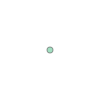

In [4]:
# 점(Point) 만들기
Point([x1, y1])

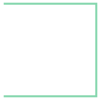

In [5]:
LineString([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

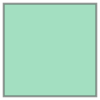

In [6]:
Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

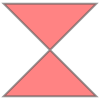

In [7]:
Polygon(([(x1,y1),(x2,y2),(x4,y4),(x3,y3)]))

Polygon의 좌표는 순서가 있으므로 잘못된 순서로 출력한다면 위와 같은 결과가 출력된다.

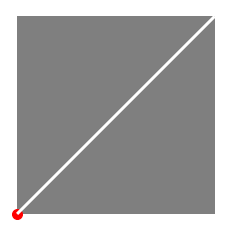

Point
LineString
Polygon


In [56]:
import matplotlib.pyplot as plt

point = Point([x1,y1])
line = LineString([(x1,y1),(x3,y3)])
polygon = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

ax = gpd.GeoSeries(polygon).plot( color='black', alpha=0.5)
gpd.GeoSeries(line).plot(ax=ax, linewidth=3, color='white')
gpd.GeoSeries(point).plot(ax=ax, color='red', markersize=100)
plt.axis('off')
plt.show()
print(point.geom_type)
print(line.geom_type)
print(polygon.geom_type)

# 2. 외부데이터 활용

##  2-1. 공간 데이터의 형태

![data_image](./image/geopandas_001.png)

외부데이터는 [서울 소방서 위치 데이터](./https://github.com/yganalyst/spatial_analysis)와 [서울 행정구역 경계 데이터](./http://data.nsdi.go.kr/dataset/15144)를 활용할 것이다.  
소방서 위치 데이터는 csv파일로 위도 경도 좌표(Point)를 가지고 있고 행정구역 경계 데이터는 shapefile로 GIS 데이터(지리 정보)를 가지고 있다.

> ### shapefile이란?
> `dbf`, `prj`, `shp`, `shx` 이렇게 4가지 중 3가지 이상의 확장자를 가진 파일을 통틀어 shapefile이라고 하며, 한 경로에 있어야 한다.
> - **dbd** : dBase 데이터베이스 파일로, 데이터프레임 형태의 정보를 가지고 있다.
> - **prj** : 공간 데이터의 좌표정보(좌표계)를 가지고 있으며, 좌표 정의가 되어 있지 않을 경우 이 파일이 없을 수 있다.
> - **shp** : vector 타입 데이터의 도형 및 정보를 담고 있다.
> - **shx** : shp와 마찬가지이며, Auto CAD에서 주로 사용된다.

## 2-2. 공간데이터 시각화

In [9]:
import pandas as pd

In [90]:
seoul_area = gpd.GeoDataFrame.from_file('./data/Seoul_area.shp', encoding='UTF-8')
pt_119 = pd.read_csv('./data/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv', encoding='CP949')

In [91]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [92]:
pt_119.head()

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145
3,3,1106102,이촌119안전센터,37.527841,126.958318
4,4,1106104,후암119안전센터,37.544896,126.981242


shp 파일에는 지리 정보인 Polygon이 있으나 csv 파일의 경우에는 단순한 데이터 프레임이므로 지리 정보가 없다.  
따라서, 지리 정보를 만들어주어야 한다.

In [93]:
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry')

pt_119.head()

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.86945 37.52716)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.09647 37.61025)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.01714 37.48777)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (126.95832 37.52784)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (126.98124 37.54490)


## 2-3. 좌표 정의 및 변환

공간 데이터를 다룰 때는 좌표계가 중요하며, 다루는 데이터에 정의된 좌표계를 알아야 변환할 수 있다. 또한 GIS 데이터를 저장할 때에는 좌표계의 이름을 명시해주도록 하자. 

대표적으로 위경도, 미터 좌표계가 있는데 국내에서는 주로 아래의 좌표계를 사용한다.
- EPSG4326(WGS84) : 위경도, 기본좌표계
- EPSG5179(TM) : 미터 좌표계
- EPSG5174(TM) : 미터 좌표계
- EPSG5181(TM) : 미터 좌표계
데이터의 좌표계를 모르면 활용할 수 없다. 따라서, 좌표계를 아는 것은 중요하다.

좌표계 확인 및 정의는 `.crs`인자로, 변환은 `.to_crs` 인자로 가능하다.

In [94]:
print(seoul_area.crs)
print(pt_119.crs)

epsg:5179
None


서울 소방서의 위치 데이터는 아직 좌표 정의가 되어있지않다.  
파일명에 기본 좌표계로 명시되어 있으므로 다음과 같이 정의해주자.

In [95]:
pt_119.crs = {'init':'epsg:4326'}
print(pt_119.crs)

+init=epsg:4326 +type=crs


C:\Users\bauser01\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


두 데이터의 좌표계가 다르면 같이 처리할 수 없으므로,  
같은 좌표계로 변경해주자.

In [96]:
pt_119 = pt_119.to_crs({'init':'epsg:5179'})

두 데이터를 모두 시각화

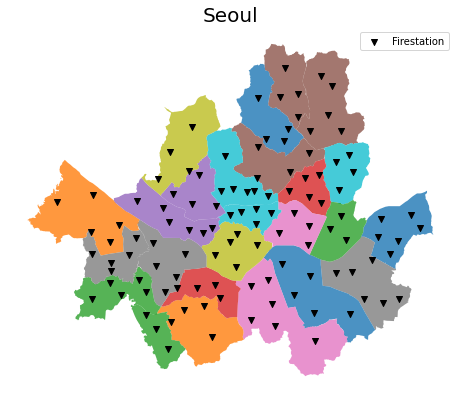

In [97]:
ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), alpha=0.8)
pt_119.plot(ax=ax, marker='v', color='black', label='Firestation')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

확인 결과,  서울 지도 데이터의 서초구 데이터가 잘못되어 있다.  
해당 데이터는 [QGIS](../QGIS/qgis_tutorial.md)를 통해 해결해주자.

# 3. 공간 정보 데이터 처리

## 3-1. 객체 속성
   1. [`area`](#area) : 면적 계산
   2. [`length`](#length) : 길이 계산
   3. [`boundary`](#boundary) : 테두리(LineString 객체)
   4. [`exterior`](#exterior) : 테두리(LineRing 객체)
   5. [`centroid`](#centroid) : 무게중심점
   6. [`xy`](#xy) : Point 객체 좌표 반환
   7. [`coords`](#coords) : LinString 객체 좌표 반환
   8. [`is_valid`](#is_valid) : 도형 유효성 검사(boolean)
   9. [`geom_type`](#geom_type) : 공간 객체 타입

### area

In [98]:
# area
seoul_area.geometry.area.head()

0    2.453758e+07
1    3.383061e+07
2    3.946631e+07
3    4.685083e+07
4    2.954112e+07
dtype: float64

### length

In [99]:
seoul_area.geometry.length.head()

0    24029.227412
1    30532.219899
2    35504.681042
3    43978.564653
4    27448.698426
dtype: float64

polygon의 `length`는 테두리의 길이(둘레)이다.

### boundary

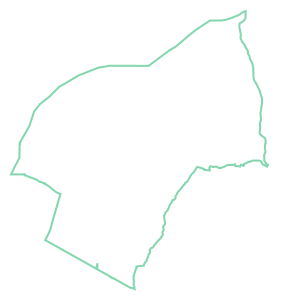

In [100]:
# boundary
seoul_area.geometry[0].boundary

`boundary`는 polygon 객체의 둘레로 `lineString`객체를 반환

### centroid

In [101]:
# centroid
seoul_area.geometry.centroid.head()

0    POINT (968820.295 1950182.074)
1    POINT (965998.688 1945219.460)
2    POINT (961369.995 1944245.952)
3    POINT (958548.929 1941666.568)
4    POINT (950951.582 1941050.947)
dtype: geometry

### xy와 coords

In [102]:
#xy와 coords
print(pt_119['geometry'][0].xy)
print(pt_119['geometry'][0].coords)
print(list(pt_119['geometry'][0].coords))

(array('d', [944285.7077635808]), array('d', [1947726.3905374545]))


TypeError: 'Series' object is not callable

`xy`와 `coords`는 사실 shaply의 공간 객체인 `Point`와 `LineString`의 속성이기 때문에 `GeoDataFrame`과 `GeoSeries`에 바로 적용할 수 없다.    
또한, Polygon의 좌표를 가져오기 위해서는 `boundary`로 `LineString` 객체를 만들고 `coords` 속성을 list 타입으로 추출하여야한다.

### is_valid

In [103]:
# is_is valid
seoul_area.geometry.is_valid.head()

0     True
1    False
2     True
3     True
4     True
dtype: bool

`is_valid`는 도형의 타당성을 확인하는 속성이다.   
실제 데이터를 사용하다보면, 좌표가 잘못되어 있거나 선이 잘못 그려져 있는데 데이터를 심심치 않게 볼 수 있다.   
[QGIS Tutorial](./QGIS/qgis_tutorial.md)에 수정하는 방법이 있으니 참고하자.

## 3-2. 공간 관계

   1. `within` : 포함되는지 여부
   2. `cotain` : 포함하고 있는 지 여부
   3. `intersects` : 교차하는지 여부 (경계 포함)
   4. `crosses` : 교차하는지 여부 (경계 미포함)
   5. `distance` : 두 공간 사이의 직선(최단)거리 (유클리디안 거리)

### within과 contain

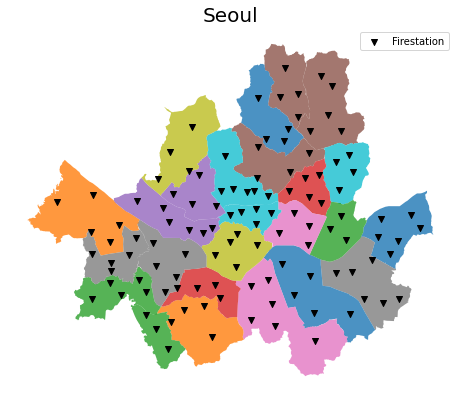

In [104]:
ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), alpha=0.8)
pt_119.plot(ax=ax, marker='v', color='black', label='Firestation')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

`within`과 `contain`는 어법이 반대인 것만 빼면 같은 함수라 할 수 있고 같은 결과를 반환

In [105]:
# 고덕119안전센터는 강동구 안에 있다.  
print(pt_119.geometry[17].within(seoul_area.geometry[0]))

# 강동구 안에는 고덕119안전센터가 있다.  
print(seoul_area.geometry[0].contains(pt_119.geometry[17]))

True
True


같은 함수이지만 N:1과 1:1 관계에만 적용되므로 1:N의 관계에 적용하기 위해 두 가지의 함수를 제공한다.

### intersects & crosses

In [106]:
# 강동구와 송파구는 맞닿아 있다.
print(seoul_area.geometry[1].intersects(seoul_area.geometry[1]))

# 하지만 cross 되지는 않는다.
print(seoul_area.geometry[1].crosses(seoul_area.geometry[1]))

True
False


`intersects`와 `crosses` 속성 또한 N:1이 적용 가능

### distance

`distance`는 모든 공간 객체의 유클리디안 거리를 계산해준다.

In [107]:
# distance
dist = pt_119['geometry'].loc[0].distance(pt_119['geometry'].loc[101])
print("약 %s m" % round(dist))

약 4092 m


## 3-3. 공간 연산 및 변형

   1. `buffer` : 주어진 거리 내의 모든 점을 이어 Polygon을 만들어준다.
   2. `envelope` : Polygon을 감싸는 가장 작은 사각형 Polygon 객체를 만든다.
   3. `convexhull` : Polygon에 대하여 convex-hull(볼록껍질)을 만든다.
   4. `unary_union` : 여러 공간 데이터의 합집합을 구한다.
   5. `dissolve` : 합집합을 구한다. (groupby 기능이 포함)
   6. `overlay` : 합집합, 차집합, 교집합 등 공간 연산 기능을 제공한다.  

`buffer`는 모든 공간 객체에 적용이 가능하고, `envelope`는 Polygon 객체에만 적용이 가능하다.

### buffer & envelope

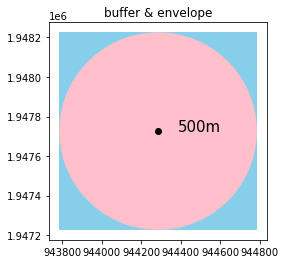

In [108]:
# buffer & envelope
yangcheon = pt_119.geometry.iloc[0]
ax = gpd.GeoSeries(yangcheon.buffer(500).envelope).plot(color='skyblue')
gpd.GeoSeries(yangcheon.buffer(500)).plot(color='pink', ax=ax)
gpd.GeoSeries(yangcheon).plot(figsize=(5,5), color='black', ax=ax)
plt.title("buffer & envelope")
plt.text(yangcheon.x+100, yangcheon.y, "500m", fontsize=15)
plt.show()

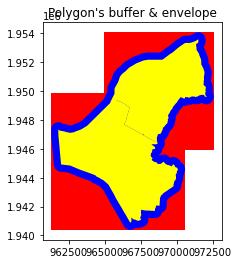

In [109]:
ax = gpd.GeoSeries(seoul_area.geometry[:2].buffer(500).envelope).plot(color='red')
gpd.GeoSeries(seoul_area.geometry[:2].buffer(500)).plot(ax=ax, color='blue')
gpd.GeoSeries(seoul_area.geometry[:2]).plot(ax=ax, color='yellow')
plt.title("Polygon's buffer & envelope")
plt.show()

~~`LineString`은 직접해보도록 하자~~

추가적으로, 위에서 `is_valid`를 설명할 때, 송파구가 유효하지 않은 객체임을 확인했었다.  
shapefile의 경우 경계가 정확하지 않은 경우가 많이 있다. 이런 것을 Topology Error라고 부르며, 다양한 처리 방식이 존재한다. 여기서는 `buffer`을 이용하여 보정해보자

In [110]:
invalid_area = seoul_area.iloc[[1]]
print(invalid_area.is_valid)
print(invalid_area.buffer(0).is_valid)

1    False
dtype: bool
1    True
dtype: bool


이렇게 조금의 `buffer`만으로도 유효한 객체가 생성된다.  
_안 될 경우, 조금 씩 증가_

### convexhull

`convexhull`이란 2차원 평면상에 여러 개의 점이 있을 때 일부를 이용하여 내부의 모든 점을 포함시키는 다각형을 만드는 것을 의미한다.

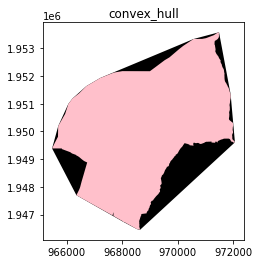

In [111]:
# convex_hull
gangdong = seoul_area.iloc[[0]]
ax = gangdong.convex_hull.plot(color='black')
gangdong.plot(figsize=(5,5), ax=ax, color='pink')
plt.title("convex_hull")
plt.show()

### unary_union와 dissolve

이제 `unary_union`와 `dissolve`를 알아보기 위해 서울시 생활권 계획에 따른 5개 생활권 Grouping을 해보자

In [119]:
dict_ = {}
dict_['서남권'] = ["강서구","양천구","구로구","영등포구","금천구","동작구","관악구"]
dict_['동남권'] = ["서초구","강남구","송파구","강동구"]
dict_['서북권'] = ["은평구","마포구","서대문구"]
dict_['도심권'] = ["종로구","중구","용산구"]
dict_['동북권'] = ["서울시도봉구","강북구","서울시노원구","서울시성북구","동대문구","성동구","중랑구","광진구"]

for k,v in dict_.items():
    seoul_area.loc[seoul_area['SGG_NM'].isin(v), 'group'] = k

한글 깨짐 현상이 발생하여, 코드를 추가하였다.

In [123]:
# plot 한글 깨짐 현상 해결법
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

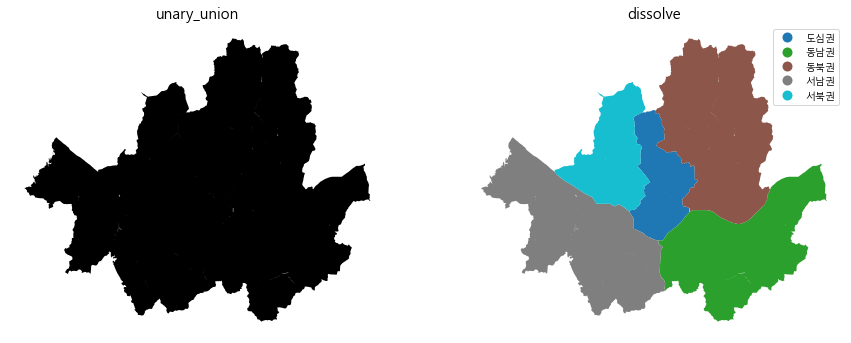

In [124]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1, 2, 1)
gpd.GeoSeries(seoul_area.unary_union).plot(color='black', ax=ax)
ax.set_title("unary_union", fontsize=15)
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
seoul_area.dissolve(by='group').reset_index().plot(column = 'group', ax=ax, legend=True)
ax.set_title("dissolve", fontsize=15)
ax.set_axis_off()

### Overlay

다음은 `overlay`이다.  
공간 연산 규칙의 기본 4가지는 아래와 같다. 이는 개별 객체(Polygon, LineString)에 대한 연산이 아니라 데이터 프레임 전체를 다룰 수 있는 Geopandas 기능이다.  
개별 객체에 대한 기능은 `shapely`의 함수이며 이를 연계하여 Geopandas에서 활용하게 되는 것이다.

![overlay](https://yganalyst.github.io/assets/images/gis/geopandas_2/spatial_manipulation.PNG)

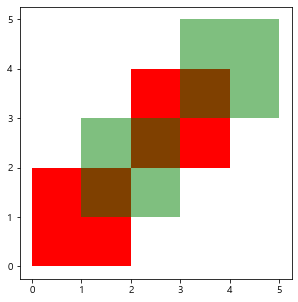

In [133]:
from shapely.geometry import Polygon

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                        Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                        Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

ax = df1.plot(color='red', figsize=(5,5))
df2.plot(ax=ax, color='green', alpha=0.5)
plt.show()

1. `union` : 합집합

   df1  df2                                           geometry
0  1.0  1.0  POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....
1  2.0  1.0  POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3....
2  2.0  2.0  POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4....
3  1.0  NaN  POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1....
4  2.0  NaN  MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...
5  NaN  1.0  MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000...
6  NaN  2.0  POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5....


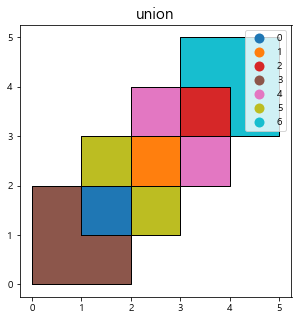

In [134]:
res_union = gpd.overlay(df1, df2, how='union')
print(res_union)
res_union = res_union.reset_index()
res_union['index'] = res_union['index'].astype(str)

ax = res_union.plot(column='index', legend=True, figsize=(5,5))
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')
plt.title("union", fontsize=15)
plt.show()

Union 결과 총 7개의 Polygon데이터로 분할되었다.    
여러 개의 Polygon으로 형성된 MultiPolygon이 있으며 개별적인 Polygon을 원할 시, 따로 분리를 해주어야한다.

2. `intersection` : 교집합

   df1  df2                                           geometry
0    1    1  POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....
1    2    1  POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3....
2    2    2  POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4....


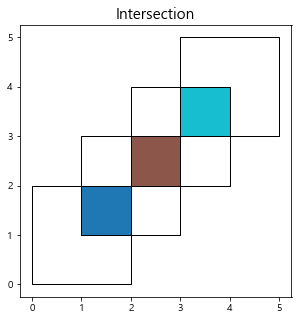

In [135]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
print(res_intersection)

ax = res_intersection.plot(figsize=(5,5),cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')
plt.title("Intersection", fontsize=15)
plt.show()

3. `symmetric_difference` : 양 쪽 차집합 (합집합 - 교집합)

   df1  df2                                           geometry
0  1.0  NaN  POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1....
1  2.0  NaN  MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...
2  NaN  1.0  MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000...
3  NaN  2.0  POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5....


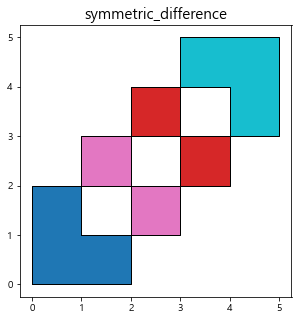

In [136]:
printres_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')
print(printres_symdiff)

ax = printres_symdiff.plot(figsize=(5,5),cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')
plt.title("symmetric_difference", fontsize=15)
plt.show()

4. `difference` : 차집합

                                            geometry  df1
0  POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1....    1
1  MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...    2


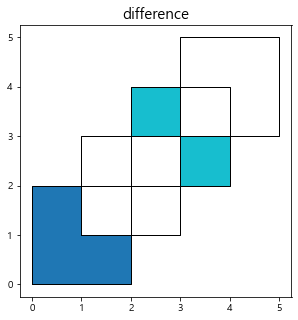

In [139]:
res_difference = gpd.overlay(df1, df2, how='difference')
print(res_difference)

ax = res_difference.plot(figsize=(5,5),cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')
plt.title("difference", fontsize=15)
plt.show()